--- Testing Final Features: Saturation & Plotting ---
Created data with known latent dim=7, shape=torch.Size([999, 20, 100])
----------------------------------------

--- Running Split 1/5 ---
Starting parameter sweep with 6 workers...
Created 9 tasks for the sweep...
Epoch 1/10 | Test MI: -0.0403
Epoch 2/10 | Test MI: -0.0343
Epoch 3/10 | Test MI: -0.0310
Epoch 4/10 | Test MI: -0.0301
Epoch 5/10 | Test MI: -0.0294
Epoch 6/10 | Test MI: -0.0277
Epoch 7/10 | Test MI: -0.0219
Epoch 8/10 | Test MI: -0.0101
Epoch 9/10 | Test MI: 0.0025
Epoch 10/10 | Test MI: 0.0111
Best epoch identified (via smoothed curve): 10 (Smoothed MI: 0.0071)
Epoch 1/10 | Test MI: -0.0116
Epoch 2/10 | Test MI: -0.0014
Epoch 3/10 | Test MI: 0.0054
Epoch 4/10 | Test MI: 0.0104
Epoch 5/10 | Test MI: 0.0144
Epoch 6/10 | Test MI: 0.0166
Epoch 7/10 | Test MI: 0.0175
Epoch 8/10 | Test MI: 0.0192
Epoch 9/10 | Test MI: 0.0187
Epoch 10/10 | Test MI: 0.0207
Best epoch identified (via smoothed curve): 10 (Smoothed MI: 0.0201)
E

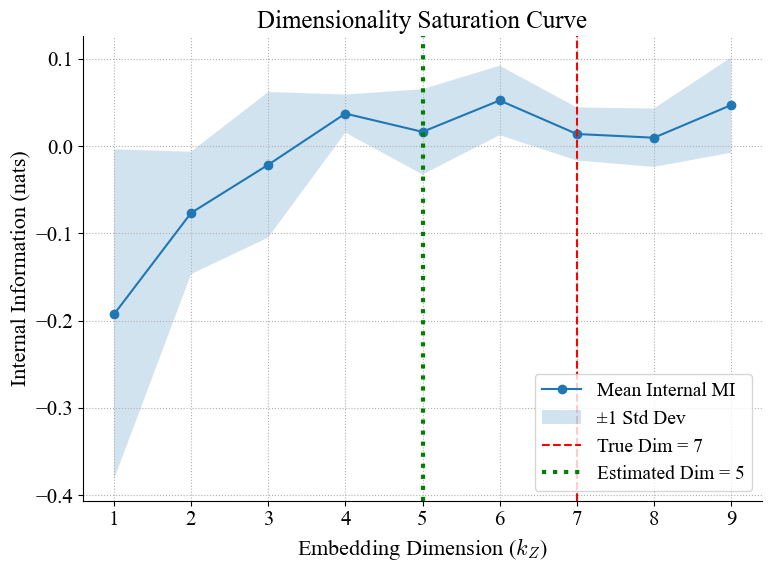


✅ All final features tested successfully!


In [1]:
# test_final_features.ipynb

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import neural_mi
from neural_mi.data.processors import ContinuousProcessor
# --- Import our new and updated functions ---
from neural_mi.analysis.dimensionality import find_saturation_point
from neural_mi.visualize.plot import plot_dimensionality_curve, set_publication_style

if __name__ == '__main__':
    print(f"--- Testing Final Features: Saturation & Plotting ---")
    device = 'cpu'

    # --- 1. Generate data with a known low-dimensional structure ---
    N_SAMPLES = 50000; N_CHANNELS = 20; LATENT_DIM = 7
    latent_signal = np.random.randn(LATENT_DIM, N_SAMPLES)
    projection_matrix = np.random.randn(N_CHANNELS, LATENT_DIM)
    x_raw = projection_matrix @ latent_signal + np.random.randn(N_CHANNELS, N_SAMPLES) * 0.2
    
    cont_proc = ContinuousProcessor(window_size=100, step_size=50)
    x_data = cont_proc.process(x_raw).to(device)
    print(f"Created data with known latent dim={LATENT_DIM}, shape={x_data.shape}")
    print("-" * 40)
    
    # --- 2. Run the full dimensionality analysis ---
    base_params = {'hidden_dim': 128, 'n_layers': 2, 'learning_rate': 1e-4, 'n_epochs': 10, 'batch_size': 128, 'patience': 5}
    sweep_grid = {'embedding_dim': range(1,10)}
    
    summary_df = neural_mi.run(x_data, mode='dimensionality', base_params=base_params,
                                   sweep_grid=sweep_grid, n_splits=5, n_workers=6)
    print("\nDimensionality Analysis Results:")
    print(summary_df)
    print("-" * 40)
    
    # --- 3. Use our new function to estimate the saturation point ---
    estimated_dim = find_saturation_point(summary_df, strictness=0.5)
    print(f"\nGround Truth Dimensionality: {LATENT_DIM}")
    print(f"Estimated Saturation Point (Dimensionality): {estimated_dim}")
    print("-" * 40)

    # --- 4. Use our new plotting tools to create a publication-quality figure ---
    print("\nGenerating publication-style plot...")
    set_publication_style() # Apply our new default style
    
    ax = plot_dimensionality_curve(
        summary_df,
        true_dimensionality=LATENT_DIM,
        estimated_dimensionality=estimated_dim
    )
    plt.show()

    print("\n✅ All final features tested successfully!")

--- Dedicated Test: Rigorous Workflow with Visualization ---
Data shape: torch.Size([4991, 5, 100])
----------------------------------------
Created 36 tasks to run...
Running all training tasks in parallel...
Epoch 1/15 | Test MI: 0.0101
Epoch 2/15 | Test MI: 0.0437
Epoch 3/15 | Test MI: 0.1142
Epoch 4/15 | Test MI: 0.1932
Epoch 5/15 | Test MI: 0.2517
Epoch 6/15 | Test MI: 0.2996
Epoch 7/15 | Test MI: 0.3408
Epoch 8/15 | Test MI: 0.3757
Epoch 9/15 | Test MI: 0.4065
Epoch 10/15 | Test MI: 0.4330
Epoch 11/15 | Test MI: 0.4552
Epoch 12/15 | Test MI: 0.4742
Epoch 13/15 | Test MI: 0.4927
Epoch 14/15 | Test MI: 0.5074
Epoch 15/15 | Test MI: 0.5201
Best epoch identified (via smoothed curve): 15 (Smoothed MI: 0.5145)
Epoch 1/15 | Test MI: 0.0015
Epoch 2/15 | Test MI: 0.0159
Epoch 3/15 | Test MI: 0.0336
Epoch 4/15 | Test MI: 0.0588
Epoch 5/15 | Test MI: 0.0918
Epoch 6/15 | Test MI: 0.1265
Epoch 7/15 | Test MI: 0.1556
Epoch 8/15 | Test MI: 0.1804
Epoch 9/15 | Test MI: 0.2031
Epoch 10/15 | Test 

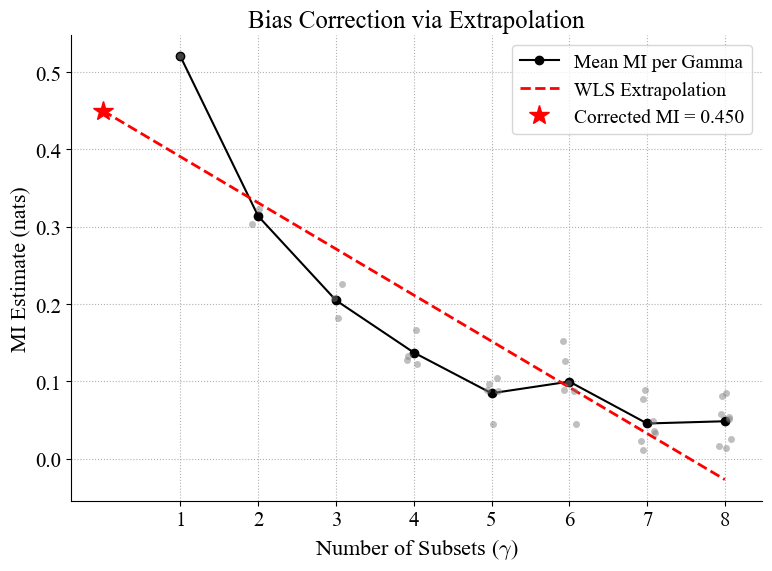


✅ Rigorous workflow and visualization test completed successfully!


In [1]:
# test_rigorous_with_plot.ipynb

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from multiprocessing import Pool

# Import all necessary components from our library
import neural_mi
from neural_mi.data.processors import ContinuousProcessor
from neural_mi.visualize.plot import plot_bias_correction_fit, set_publication_style
from neural_mi.analysis.workflow import AnalysisWorkflow, _run_training_task # Import the internal task runner

# This check is important for multiprocessing to work correctly
if __name__ == '__main__':
    print(f"--- Dedicated Test: Rigorous Workflow with Visualization ---")
    device = 'cpu'

    # --- 1. Generate Correlated Data ---
    N_SAMPLES = 50000
    x_raw = np.random.randn(5, N_SAMPLES)
    y_raw = x_raw + np.random.randn(5, N_SAMPLES) * 0.1
    
    cont_proc = ContinuousProcessor(window_size=100, step_size=10)
    x_data = cont_proc.process(x_raw).to(device)
    y_data = cont_proc.process(y_raw).to(device)
    print(f"Data shape: {x_data.shape}")
    print("-" * 40)

    # --- 2. Define a Fixed Set of Hyperparameters ---
    base_params = {
        'hidden_dim': 128, 
        'n_layers': 2, 
        'learning_rate': 1e-4,
        'n_epochs': 15,
        'batch_size': 128, 
        'patience': 5
    }
    rigorous_params = {'embedding_dim': [16]}
    gamma_range = range(1, 9)

    # --- 3. Run the Full Workflow to Get Results for Plotting ---
    # To get the raw results for plotting, we'll manually orchestrate the workflow steps
    
    # a. Instantiate the workflow
    workflow = AnalysisWorkflow(x_data, y_data, base_params, critic_type='separable')
    
    # b. Prepare the list of all individual training tasks
    task_list = workflow._prepare_tasks(param_grid=rigorous_params, gamma_range=gamma_range)
    
    # c. Run all tasks in parallel to get the raw results
    print("Running all training tasks in parallel...")
    with Pool(processes=4) as pool:
        raw_results = list(pool.map(_run_training_task, task_list))
    print("All tasks finished.")

    # d. Run the post-processing step to get the corrected fit
    corrected_results = workflow._post_process_and_correct(
        raw_results, 
        delta_threshold=0.1, 
        min_gamma_points=5, 
        confidence_level=0.68,
        verbose=True # Use verbose mode to see the fit details
    )
    
    print("\n" + "-" * 40)
    print("--- Verification of Final Corrected Result ---")
    final_result = corrected_results[0]
    print(f"\nFinal Bias-Corrected MI Estimate:")
    print(f"  MI = {final_result['mi_corrected']:.4f} ± {final_result['mi_error']:.4f}")
    print(f"  Reliable Fit: {final_result['is_reliable']}")
    print(f"  Gammas Used in Final Fit: {final_result['gammas_used']}")
    print("-" * 40)
    
    # --- 4. Visualize the Fit ---
    print("\n--- Generating Publication-Style Plot ---")
    set_publication_style()
    
    # We now have everything we need for the plot
    plot_bias_correction_fit(
        raw_results_df=pd.DataFrame(raw_results), 
        corrected_result=final_result, 
    )
    plt.show()

    print("\n✅ Rigorous workflow and visualization test completed successfully!")